In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(37) # 使得每次运行得到的随机数都一样

In [2]:
from sklearn.cluster import KMeans
# 构建一个函数来完成图像的矢量量化操作
def image_VQ(image,K_nums): # 貌似很花时间。。
    # 构建一个KMeans对象
    kmeans=KMeans(n_clusters=K_nums,n_init=4)
    # 用这个KMeans对象来训练数据集，此处的数据集就是图像
    img_data=image.reshape((-1,1))
    kmeans.fit(img_data)
    centroids=kmeans.cluster_centers_.squeeze() # 每一个类别的质心
    labels=kmeans.labels_ # 每一个类别的标记
    return np.choose(labels,centroids).reshape(image.shape)


In [3]:
# 将原图和压缩图都绘制出来，方便对比查看效果
def plot_imgs(raw_img,VQ_img,compress_rate):
    assert raw_img.ndim==2 and VQ_img.ndim==2, "only plot gray scale images"
    plt.figure(12,figsize=(25,50))
    plt.subplot(121)
    plt.imshow(raw_img,cmap='gray')
    plt.title('raw_img')
    
    plt.subplot(122)
    plt.imshow(VQ_img,cmap='gray')
    plt.title('VQ_img compress_rate={:.2f}%'.format(compress_rate))
    plt.show()

In [4]:
import cv2
def compress_plot_img(img_path,num_bits):
    assert 1<=num_bits<=8, 'num_bits must be between 1 and 8'
    K_nums=np.power(2,num_bits)
    
    # 计算压缩率
    compression_rate=round(100*(8-num_bits)/8,2)
#     print('compression rate is {:.2f}%'.format(compression_rate))
    
    image=cv2.imread(img_path,0) # 读取为灰度图
    VQ_img=image_VQ(image,K_nums)
    plot_imgs(image,VQ_img,compression_rate)

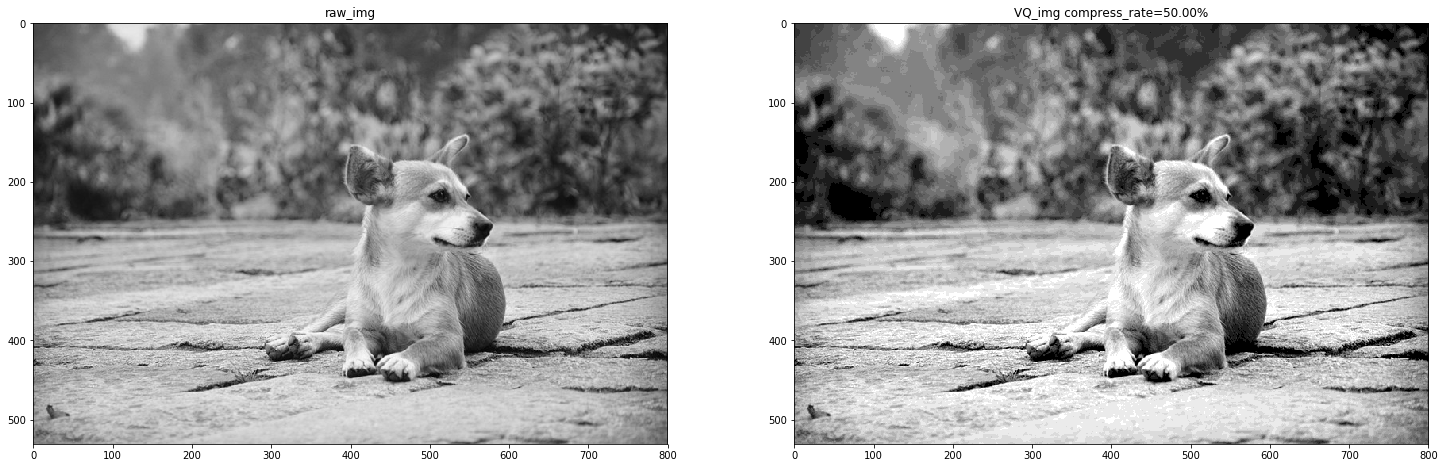

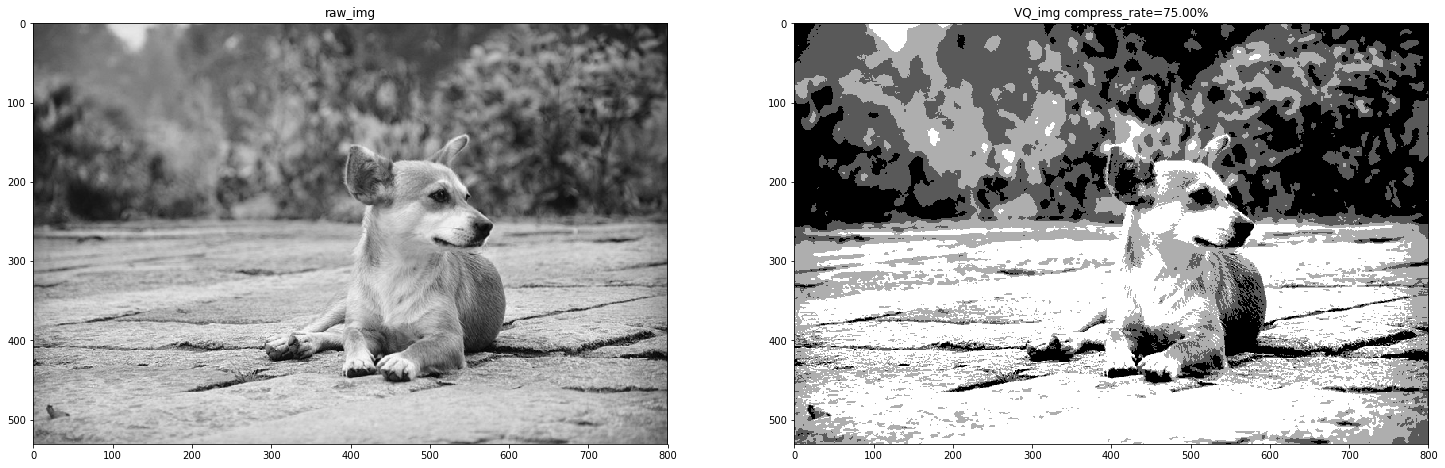

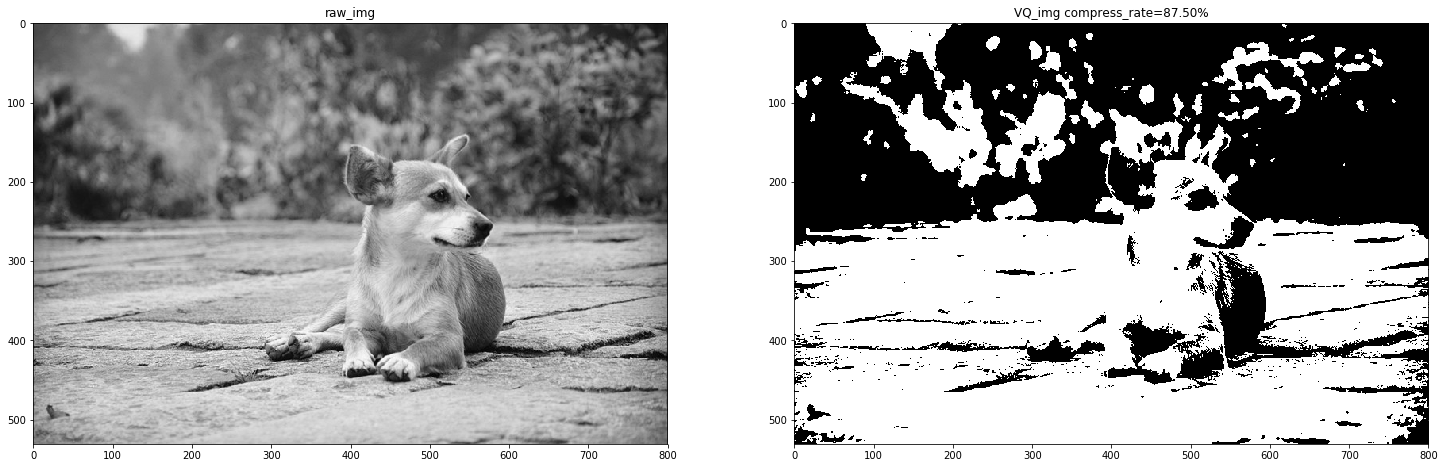

In [5]:
img_path='./dog.jpg'
compress_plot_img(img_path,4)
compress_plot_img(img_path,2)
compress_plot_img(img_path,1)
